# **ANÁLISE DE DADOS**

### Dataset de treino
#### Tópicos:
- Gráfico de barras do PClass
- Gráfico de barras da quantidade de adultos e crianças
- Gráfico de pizza dos gêneros
- Gráfico de pizza do Survived
- Quantos homens e quantas mulheres sobreviveram e morreram
- Quantos adultos e crianças sobreviveram e morreram
- Quantos sobreviveram e morreram de cada classe da Pclass

<hr>

### **IMPORTS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

<hr>

### **TRATAMENTO INICIAL**

#### TRATANDO DADOS FALTANTES

In [2]:
test=pd.read_csv('Data/test.csv')
train=pd.read_csv('Data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.fillna({'Age':train.Age.mean()}, inplace=True)
train.fillna({'Embarked':0}, inplace=True)
train.drop(columns=['Cabin'], inplace=True)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### TRATANDO DADOS CATEGÓRICOS 
- (str -> int)

In [5]:
"""
train['Sex'][(train['Sex'] == 'male')] = 0
train['Sex'][(train['Sex'] == 'female')] = 1
"""

train.replace({'male':0, 'female':1}, inplace=True)

In [6]:
faixa_etaria=[]
for i in train['Age']:
    if i <= 18:
        faixa_etaria.append('Crianca')
        continue
    faixa_etaria.append('Adulto')
train['faixa_etaria']=faixa_etaria

train.replace({'Adulto':0, 'Crianca':1}, inplace=True)

#### VISUALIZANDO DATASET APÓS TRATAMENTOS

In [7]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,faixa_etaria
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,0


<hr>

### **PLOTAGEM DE GRÁFICOS**

#### GRÁFICOS DE BARRA

Text(0.5, 1.0, 'Gráfico das classes de ingresso')

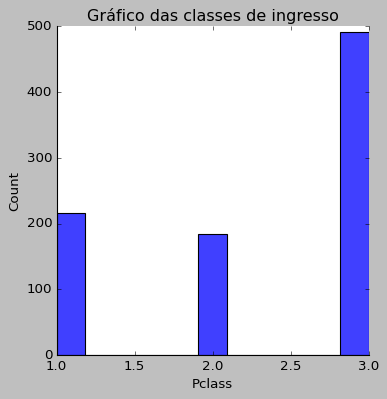

In [8]:
# gráfico de barras do PClass
sns.displot(data=train, x="Pclass")
plt.title("Gráfico das classes de ingresso")

Text(0.5, 1.0, 'Gráfico da quantidade de adultos e crianças')

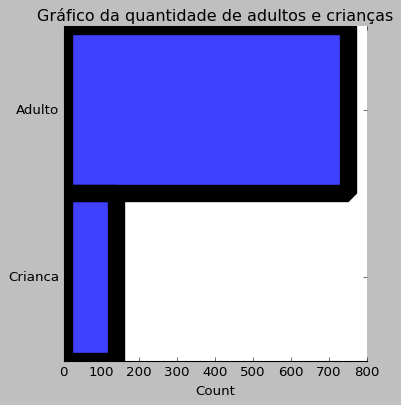

In [9]:
# gráfico de barras da quantidade de adultos e crianças
sns.displot(y=faixa_etaria, legend=['Adulto', 'Criança'])
plt.title("Gráfico da quantidade de adultos e crianças")

Text(0.5, 1.0, 'Quantos homens e quantas mulheres sobreviveram e morreram')

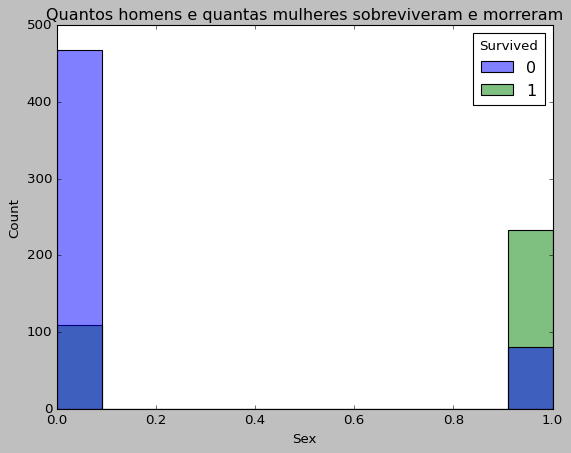

In [10]:
# gráfico de barras da quantidade de homens e mulheres que sobreviveram e morreram
sns.histplot(
    x='Sex',
    hue='Survived',
    data=train
)

plt.title('Quantos homens e quantas mulheres sobreviveram e morreram')

#### GRÁFICOS DE PIZZA

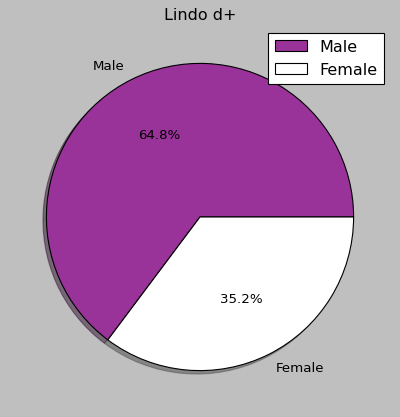

In [11]:
# gráfico de pizza dos genêros
plt.pie(
    x=train['Sex'].value_counts(),
    labels=['Male', 'Female'],
    colors=['#993399', '#ffffff'],
    autopct='%1.1f%%',
    shadow=True
)
plt.title('Lindo d+')
plt.legend()

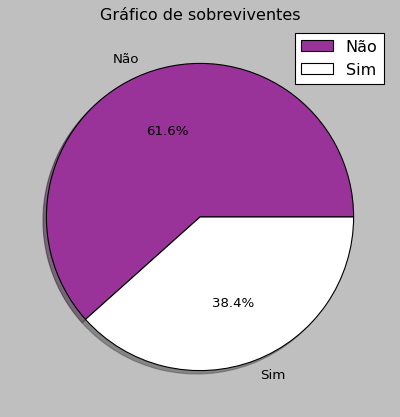

In [12]:
# gráfico de pizza do Survived
plt.pie(
    x=train['Survived'].value_counts(), 
    labels=['Não', 'Sim'],
    colors=['#993399', '#ffffff'],
    autopct='%1.1f%%',
    shadow=True,
)
plt.title('Gráfico de sobreviventes')
plt.legend()


#### GRÁFICOS DE LINHA

Text(0.5, 1.0, 'Quantos adultos e crianças sobreviveram e morreram no naufrágio\n')

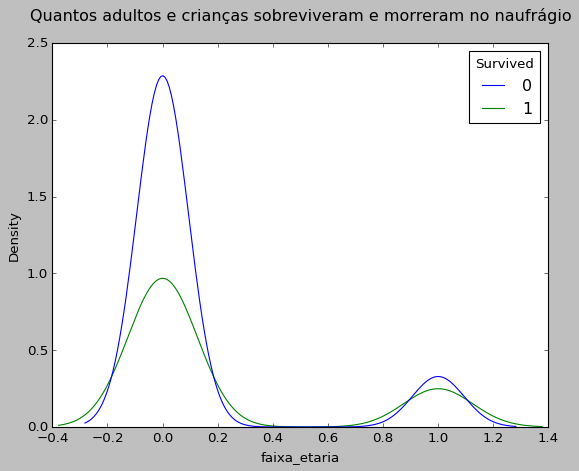

In [13]:
# grafico de linha da quantidade de adultos e crianças que sobreviveram e morreram
sns.kdeplot(
    x='faixa_etaria',
    hue='Survived', 
    data=train
)
plt.title('Quantos adultos e crianças sobreviveram e morreram no naufrágio\n')

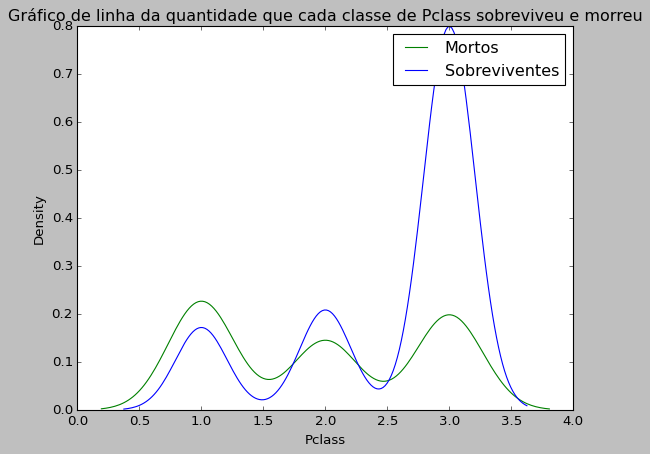

In [14]:
#Quantos sobreviveram e morreram de cada classe da Pclass
sns.kdeplot(
    x='Pclass',
    hue='Survived', 
    data=train
)
plt.title("Gráfico de linha da quantidade que cada classe de Pclass sobreviveu e morreu")
plt.legend(labels=['Mortos', 'Sobreviventes'])

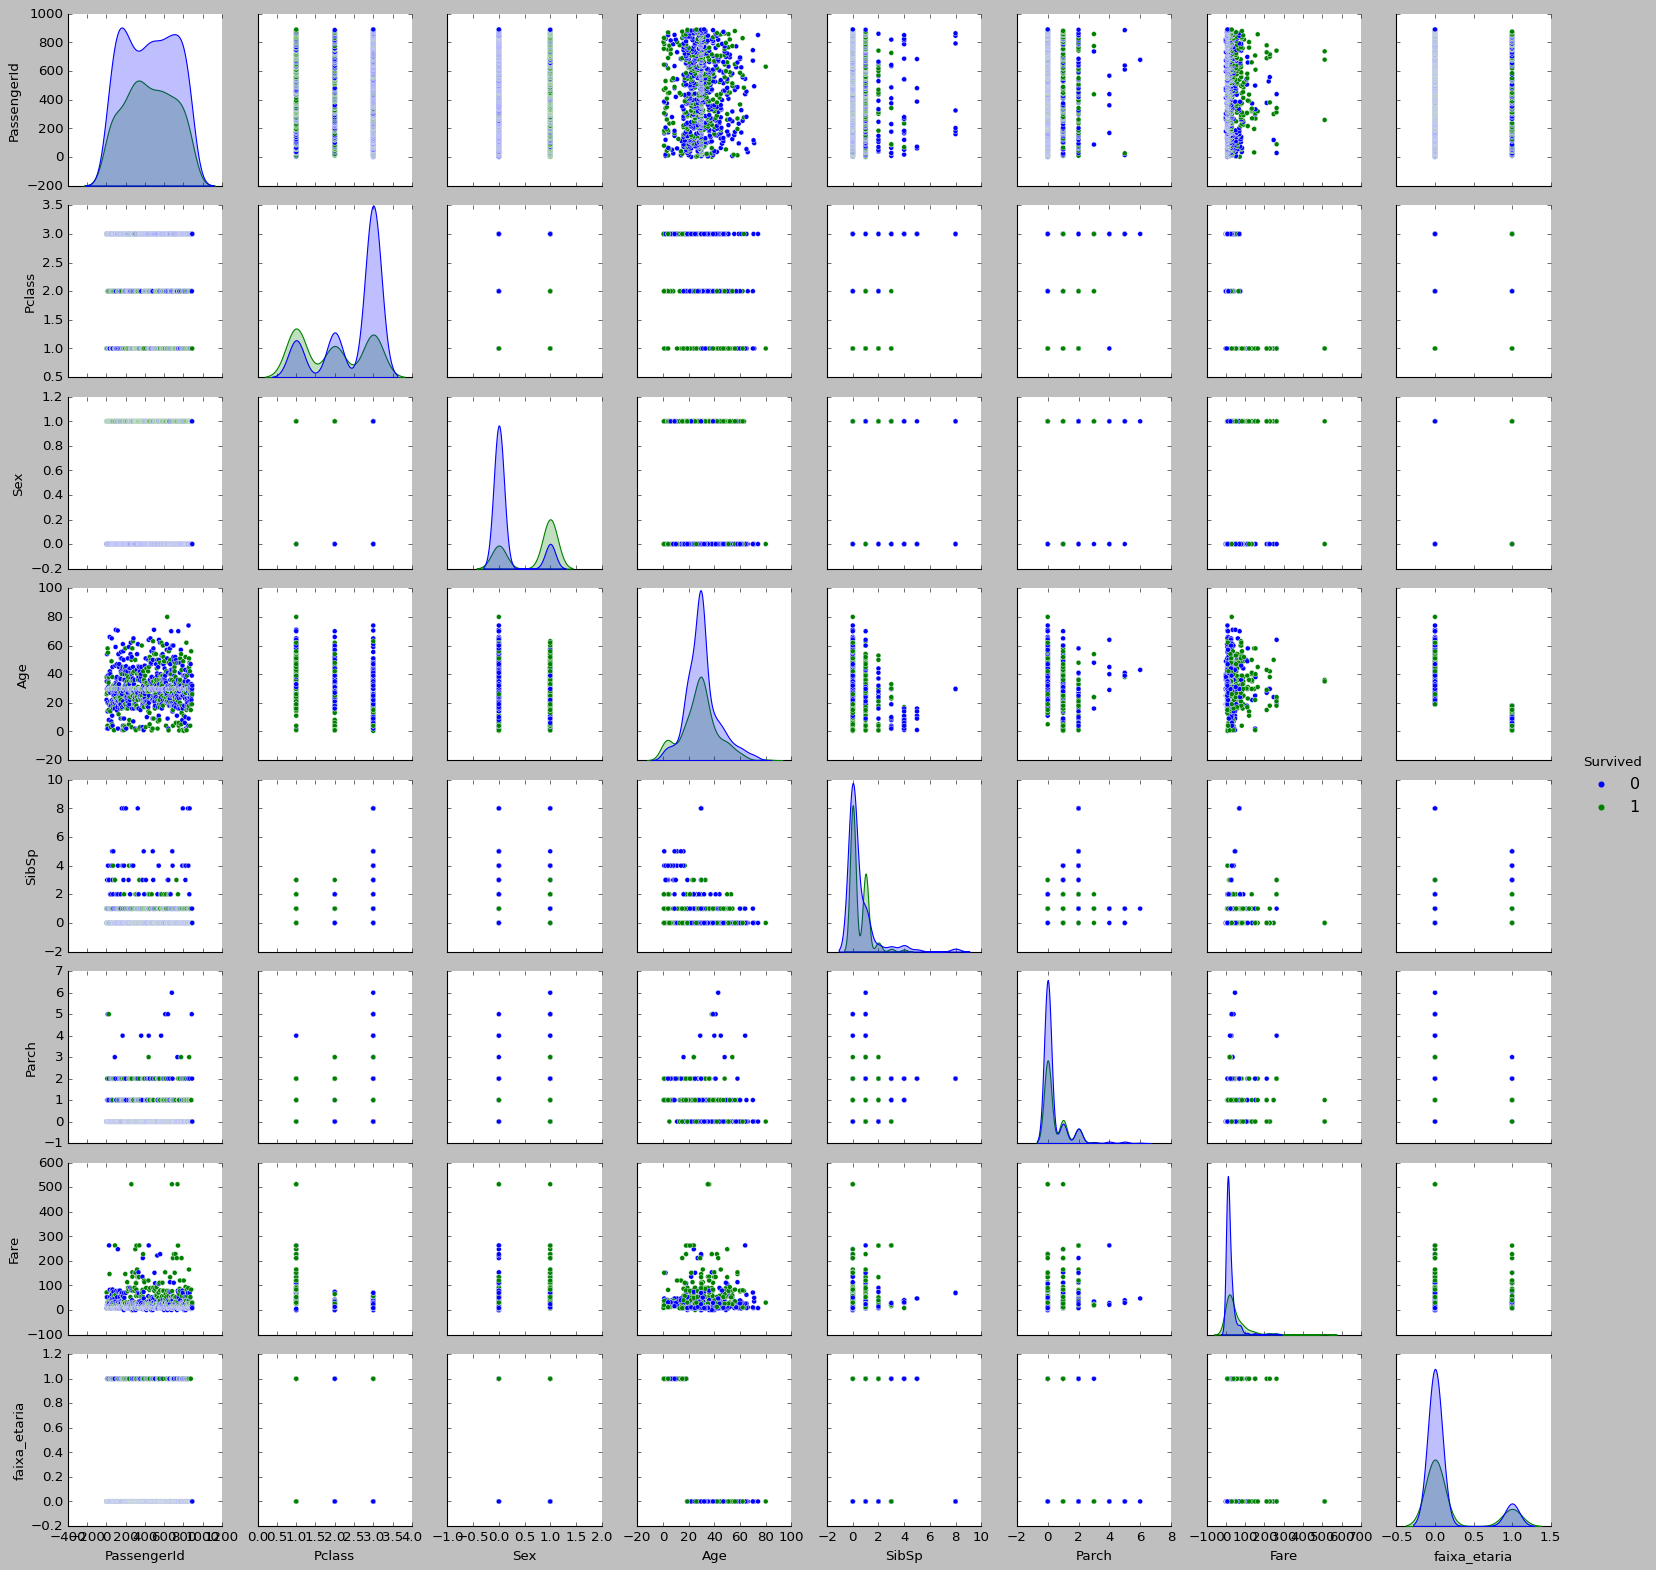

In [15]:
sns.pairplot(data=train, hue='Survived')

#### OUTROS GRÁFICOS 

In [16]:
# gráfico de pizza da quantidade de homens e mulheres que sobreviveram e morreram
"""
train[['Sex', 'Survived']].groupby('Survived').count().plot(
    kind='pie',
    autopct='%1.1f%%',
    subplots=True,
    title='Quantos homens e quantas mulheres sobreviveram e morreram',
    colors=['#993399', '#ffffff'],
    shadow=True,
)
"""

"\ntrain[['Sex', 'Survived']].groupby('Survived').count().plot(\n    kind='pie',\n    autopct='%1.1f%%',\n    subplots=True,\n    title='Quantos homens e quantas mulheres sobreviveram e morreram',\n    colors=['#993399', '#ffffff'],\n    shadow=True,\n)\n"

In [17]:
# gráfico de pizza da quantidade de aldultos e crianças e sobreviram e morreram
"""
train[['faixa_etaria', 'Survived']].groupby('Survived').count().plot(
    kind='pie',
    autopct='%1.1f%%',
    subplots=True,
    title='Gráfico da quantidade de adultos e crianças que sobreviveram e morreram',
    colors=['#993399', '#ffffff'],
    shadow=True,
)
"""

"\ntrain[['faixa_etaria', 'Survived']].groupby('Survived').count().plot(\n    kind='pie',\n    autopct='%1.1f%%',\n    subplots=True,\n    title='Gráfico da quantidade de adultos e crianças que sobreviveram e morreram',\n    colors=['#993399', '#ffffff'],\n    shadow=True,\n)\n"

In [18]:
# grafico de barras da quantidade de adultos e crianças que sobreviveram e morreram
"""
sns.histplot(
    x='faixa_etaria',
    hue='Survived',
    data=train
)
plt.title('Quantos adultos e crianças sobreviveram e morreram no naufrágio\n')
"""

"\nsns.histplot(\n    x='faixa_etaria',\n    hue='Survived',\n    data=train\n)\nplt.title('Quantos adultos e crianças sobreviveram e morreram no naufrágio\n')\n"